# 作業 : (Kaggle)鐵達尼生存預測
https://www.kaggle.com/c/titanic

# [作業目標]
- 試著模仿範例寫法, 在鐵達尼生存預測中, 觀察填補缺值以及 標準化 / 最小最大化 對數值的影響

# [作業重點]
- 觀察替換不同補缺方式, 對於特徵的影響 (In[4]~In[6], Out[4]~Out[6])
- 觀察替換不同特徵縮放方式, 對於特徵的影響 (In[7]~In[8], Out[7]~Out[8])

In [33]:
# 做完特徵工程前的所有準備 (與前範例相同)
import pandas as pd
import numpy as np
import copy
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

data_path = 'data/'
df_train = pd.read_csv(data_path + 'titanic_train.csv')
df_test = pd.read_csv(data_path + 'titanic_test.csv')

train_Y = df_train['Survived']  # 儲存解答
ids = df_test['PassengerId']
df_train = df_train.drop(['PassengerId', 'Survived'] , axis=1)  # 丟棄欄位
df_test = df_test.drop(['PassengerId'] , axis=1)  # 丟棄欄位
df = pd.concat([df_train,df_test])
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
#只取 int64, float64 兩種數值型欄位, 存於 num_features 中
num_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric Features : {num_features}\n')

5 Numeric Features : ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']



In [35]:
# 削減文字型欄位, 只剩數值型欄位
df = df[num_features]
train_num = train_Y.shape[0]  # get the row number of df_train['Survived']
df.head()

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500


# 作業1
* 試著在補空值區塊, 替換並執行兩種以上填補的缺值, 看看何者比較好?

### 補充資料：[Logistic Regression](https://chtseng.wordpress.com/2017/01/26/logistic-regression-邏輯迴歸/)

In [14]:
# 空值補 -1, 做羅吉斯迴歸
df_m1 = df.fillna(-1)
train_X = df_m1[:train_num]
estimator = LogisticRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

/home/sam16/miniconda3/envs/ml100/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sam16/miniconda3/envs/ml100/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sam16/miniconda3/envs/ml100/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sam16/miniconda3/envs/ml100/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sam16/miniconda3/envs/ml100/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: 

0.6960299128976762

In [16]:
# specify a slover: https://machinelearningmastery.com/how-to-fix-futurewarning-messages-in-scikit-learn/
estimator = LogisticRegression(solver='lbfgs')

In [17]:
# 空值補 0, 做羅吉斯迴歸
df_m2 = df.fillna(0)
train_X = df_m2[:train_num]
estimator = LogisticRegression(solver='lbfgs')
cross_val_score(estimator, train_X, train_Y, cv=5).mean()a

0.6993817972775958

In [19]:
df.mean()

Pclass     2.294882
Age       29.881138
SibSp      0.498854
Parch      0.385027
Fare      33.295479
dtype: float64

In [18]:
# 空值補平均值, 做羅吉斯迴歸
df_m3 = df.fillna(df.mean())
train_X = df_m3[:train_num]
estimator = LogisticRegression(solver='lbfgs')
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.6959413955734954

In [20]:
# 空值補 -1, 搭配最大最小化
df_m4 = df.fillna(-1)
df_temp = MinMaxScaler().fit_transform(df_m4)
train_X = df_temp[:train_num]
estimator = LogisticRegression(solver='lbfgs')
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.7005053927832138

In [24]:
# 空值補 0，搭配最大最小化
df_m6 = df.fillna(0)
df_temp = MinMaxScaler().fit_transform(df_m6)
train_X = df_temp[:train_num]
estimator = LogisticRegression(solver='lbfgs')
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.7038636251603401

In [36]:
# 空值補 0，搭配標準化
df_m7 = StandardScaler().fit_transform(df.fillna(0))
train_X = df_m7[:train_num]
estimator = LogisticRegression(solver='lbfgs')
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.6982582017719778

In [37]:
# 空值補 -1，搭配標準化  # 跟空值補0的結果相同
df_m8 = StandardScaler().fit_transform(df.fillna(-1))
train_X = df_m8[:train_num]
estimator = LogisticRegression(solver='lbfgs')
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.6982582017719778

# 作業2
* 使用不同的標準化方式 ( 原值 / 最小最大化 / 標準化 )，搭配羅吉斯迴歸模型，何者效果最好?

我的最佳結果是：空值補0，搭配最大最小化與LogisticRegression的結果分數最高  
依照課程給的方向來看：
* 標準化(Standard Scaler) : 假定數值為常態分佈，適合本⽅方式平衡特徵
* 最小最大化(MinMax Scaler) : 假定數值為均勻分佈，適合本⽅方式平衡特徵

原始資料中，數值欄位的分佈型態大都應屬於均勻分佈。  另外，搭配最大最小化的同時，缺失值使用0來補的效果比用1補的好  
補充：在標準化中，缺失值用0與用1來補，結果分數相同

In [75]:
# 查看數值的分佈狀態
val_counts_dict = {col: df[col].value_counts().count() for col in df}

In [76]:
# create Series to store column names and its value counts number

sort_cols = pd.Series(val_counts_dict).sort_values(ascending=False).index
sort_cols

Index(['Fare', 'Age', 'Parch', 'SibSp', 'Pclass'], dtype='object')

### [欄位說明](https://chtseng.wordpress.com/2017/12/24/kaggle-titanic%E5%80%96%E5%AD%98%E9%A0%90%E6%B8%AC-1/)

In [77]:
df['Pclass'].value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

Fare


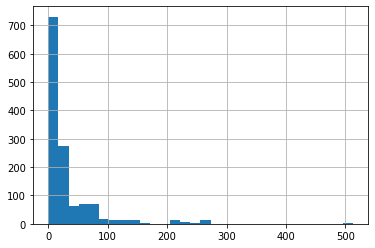

Age


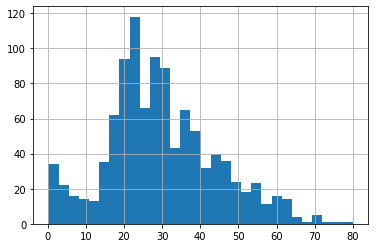

Parch


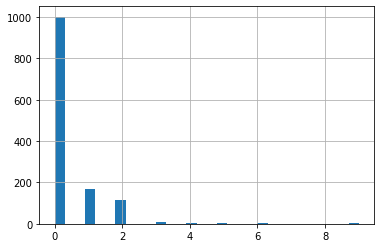

SibSp


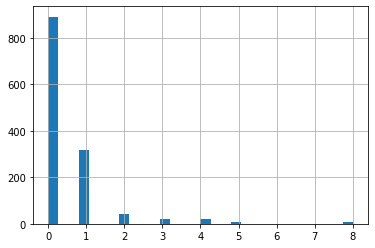

Pclass


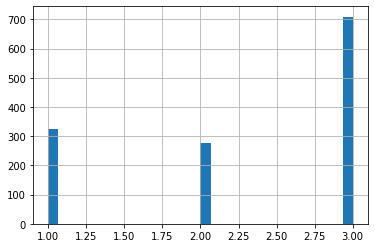

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline

for col in sort_cols:
    df[col].hist(bins=30)
    print(col)
    plt.show()

In [63]:
# 看起來不是平均分佈？